In [81]:
import matplotlib.pyplot as plt
import pandas as pd, numpy as np, math
from json import loads, dumps
e = math.exp(1)

In [82]:
proprietes = {}

with open("Network_Proprietes.json") as file:
    proprietes = file.read()
proprietes = loads(proprietes)

In [83]:
data_set = pd.read_csv(proprietes["Data Set"] + ".csv")
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [84]:
data_set.head(20)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
5,19790106,5.0,3.8,39.0,8.3,-0.5,-6.6,0.7,102780.0,1.0
6,19790107,8.0,0.0,13.0,8.5,1.5,-5.3,5.2,102520.0,0.0
7,19790108,8.0,0.1,15.0,5.8,6.9,5.3,0.8,101870.0,0.0
8,19790109,4.0,5.8,50.0,5.2,3.7,1.6,7.2,101170.0,0.0
9,19790110,7.0,1.9,30.0,4.9,3.3,1.4,2.1,98700.0,0.0


In [85]:
x = data_set.loc[(data_set.index % proprietes["Batch Size"]) == 0].copy()
x.drop(columns= ["date", "precipitation"], inplace= True)
x = x.head(5)
x.reset_index(inplace= True, drop= True)
x = x.transpose()
x.reset_index(inplace= True, drop= True)
x

,0,1,2,3,4
0,2.0,NaN,8.0,8.0,4.0
1,7.0,0.0,0.0,0.0,6.0
2,52.0,16.0,23.0,35.0,143.0
3,2.3,1.5,2.9,12.6,9.2
4,-4.1,0.0,2.8,6.8,5.0
5,-7.5,-3.5,2.1,1.6,0.5
6,101900.0,102170.0,99730.0,101640.0,100520.0
7,9.0,0.0,0.0,0.0,0.0


In [86]:
class Layer:
    def __init__(self, num_inputs, num_neurons, hidden= True):
        self.weights = pd.DataFrame(np.random.randn(num_inputs, num_neurons))
        self.biases = pd.DataFrame(np.zeros((1, num_neurons)))
        self.hidden = hidden
    def forward(self, input, ansers= [], learning = True):
        self.output = (self.weights.transpose()).dot(input.transpose())
        self.output = self.output.transpose() + (self.biases.values.tolist()[0])
        if self.hidden:
            self.output.clip(0, inplace= True)
        else:
            self.output = (e ** ((self.output.transpose() - self.output.max(axis= 1)).transpose()))
            self.output = (self.output.transpose() / self.output.sum(axis= 1)).transpose()
            if learning:
                avg = self.output[pd.get_dummies(ansers)].max().mean()
                self.output = 1 - avg

In [87]:
x

,0,1,2,3,4
0,2.0,NaN,8.0,8.0,4.0
1,7.0,0.0,0.0,0.0,6.0
2,52.0,16.0,23.0,35.0,143.0
3,2.3,1.5,2.9,12.6,9.2
4,-4.1,0.0,2.8,6.8,5.0
5,-7.5,-3.5,2.1,1.6,0.5
6,101900.0,102170.0,99730.0,101640.0,100520.0
7,9.0,0.0,0.0,0.0,0.0


In [88]:
Y = pd.Series([0, 1, 1, 0, 1])

l1 = Layer(8, 4)
l2 = Layer(4, 3)
l3 = Layer(3, 2, hidden= False)

l1.forward(x.transpose())
l2.forward(l1.output)
l3.forward(l2.output, ansers= Y, learning= True)

l3.output

0.5

--Testing--

In [89]:
df = pd.DataFrame({"Neur 1 weights": [9.1, 3], "Neur 2 weights": [2, 5], "Neur 3 weights": [1, 4]})
df.shape

(2, 3)

In [90]:
df2 = pd.DataFrame([[2.3, 4], [3, 4]])
df2.shape

(2, 2)

In [91]:
df.transpose().dot(df2)

,0,1
Neur 1 weights,29.93,48.4
Neur 2 weights,19.60,28.0
Neur 3 weights,14.30,20.0


In [92]:
df3 = pd.DataFrame([3, 9, 1])
df3

,0
0,3
1,9
2,1


In [93]:
#df.T + df3.transpose().values.tolist()[0]

In [94]:
weights = pd.DataFrame(np.random.randn(1, 3))
weights

,0,1,2
0,-0.25533,-0.01171,-2.143527


In [95]:
weights.clip(0, inplace= True)
weights

,0,1,2
0,0.0,0.0,0.0


In [96]:
df3 / df3.sum()

,0
0,0.230769
1,0.692308
2,0.076923


In [97]:
df2

,0,1
0,2.3,4
1,3.0,4


In [98]:
an = pd.Series([1,0])

In [99]:
df2[pd.get_dummies(an)].max().mean()

3.5

In [100]:
df

,Neur 1 weights,Neur 2 weights,Neur 3 weights
0,9.1,2,1
1,3.0,5,4


In [101]:
df.sum()

Neur 1 weights    12.1
Neur 2 weights     7.0
Neur 3 weights     5.0
dtype: float64

In [102]:
np.exp(4)

54.598150033144236

In [103]:
c = pd.DataFrame([[4, 1, 0, 5], [2, 3, 4, 6]])
c

,0,1,2,3
0,4,1,0,5
1,2,3,4,6


In [104]:
c.max(axis=1)

0    5
1    6
dtype: int64

In [105]:
(c.transpose() - c.max(axis= 1)).transpose()

,0,1,2,3
0,-1,-4,-5,0
1,-4,-3,-2,0


In [106]:
exp1 = 2.71828182846 ** (c.transpose() - c.max(axis= 1)).transpose()
exp1

,0,1,2,3
0,0.367879,0.018316,0.006738,1.0
1,0.018316,0.049787,0.135335,1.0


In [107]:
exp1 = (exp1.transpose() / exp1.sum(axis= 1)).transpose()
exp1

,0,1,2,3
0,0.264104,0.013149,0.004837,0.717910
1,0.015219,0.041371,0.112457,0.830953


In [108]:
exp2 = (2.71828182846 ** c)
exp2 = (exp2.transpose() / exp2.sum(axis= 1)).transpose()
exp2

,0,1,2,3
0,0.264104,0.013149,0.004837,0.717910
1,0.015219,0.041371,0.112457,0.830953


In [109]:
a = pd.Series([1,0,0,1])
c

,0,1,2,3
0,4,1,0,5
1,2,3,4,6


In [110]:
c.transpose()[pd.get_dummies(a)].transpose().max()

0    2.0
1    1.0
2    0.0
3    6.0
dtype: float64

In [111]:
mean_test = pd.DataFrame([0.0, 1.0, 0, 0])
mean_test

,0
0,0.0
1,1.0
2,0.0
3,0.0


In [112]:
mean_test.mean()

0    0.25
dtype: float64

In [113]:
test_none = None
#test_none is not None
print(test_none)

None


In [114]:
1%5

1

In [115]:
df = c.T
df

,0,1
0,4,2
1,1,3
2,0,4
3,5,6


<Axes: >

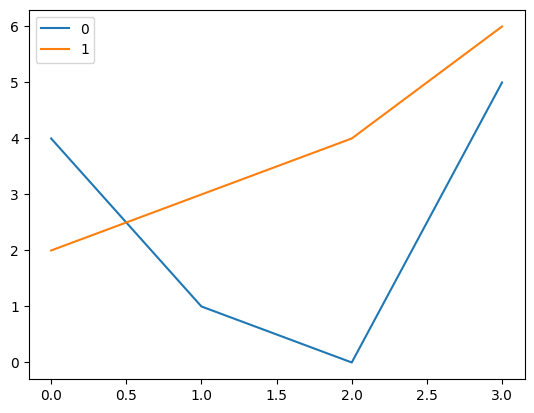

In [116]:
df.plot()

In [117]:
df = df.T
df

,0,1,2,3
0,4,1,0,5
1,2,3,4,6


In [122]:
df.drop(columns=["1"], inplace= True)
df

KeyError: "['1'] not found in axis"